# Sampling Distribution of the Mean

Often we are interested not so much in the distribution of the sample, as a summary statistic such as the mean. For example, later on in the course, we will ask questions like:

* Is the mean height of Oxford students greater than the national average?
* Is the mean wellbeing of cat owners higher than that of non-cat-owners?

We will probably want to answer these questions by *estimating* the population mean (mean height of all Oxford students, mean wellbeing score of all cat owners) from a sample.

However, if we draw multiple samples from the same population, the mean will vary from sample to sample. To know how much we can trust a small difference (eg, the mean of my sample of Oxford students' heights is 1mm taller than the national average - is it just chance?), we will therefore need to answer the following:

**How well does the sample mean reflects the underlying population mean?**

We operationalize this as follows:

**If I drew many different samples from the same population, how much would the sample mean vary from sample to sample**?

Using the computer, we can actually run this simulation - for example drawing 1000 samples from the same population - and plot the sample means. The distribution fo these sample means is called **the sampling distribution of the mean**

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Load and plot the data

We continue with the fictional Brexdex dataset.

First load the data, a set of 10,000 responses. The dataset (10,000 responses) is large enough that we can assume the distribution is quite representative of the population as a whole; we will refer to this as the *parent* distribution. 


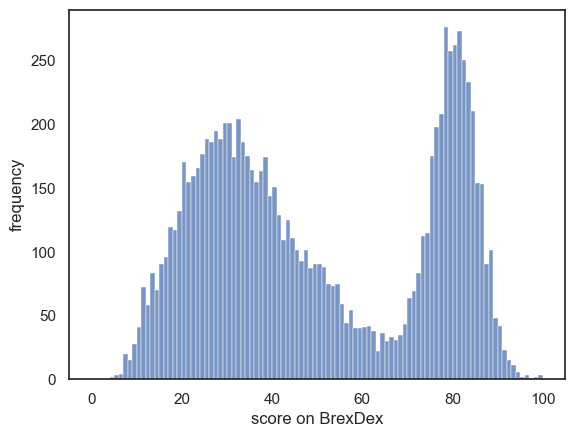

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/UKBrexdex.csv')
sns.histplot(UKBrexdex['score'], bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

## 10,000 sample means

The mean Brexdex score can be obtained from the parent distribution as follows:

In [3]:
UKBrexdex.score.mean()

49.8748

The mean score in the parent distribution is 49.9%.

We have seen that the data distribution in small samples (say, $n=20$ or $n=100$) resembles the parent distribution, so we might expect that the mean of each of these samples approximates the mean of the UK national sample.

Let's try drawing a large number of random samples with $n=100$, and getting the mean of each one:

In [4]:
nSamples = 10000 # we will draw 10,000 samples
samplesize=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()

Let's plot the resulting means:

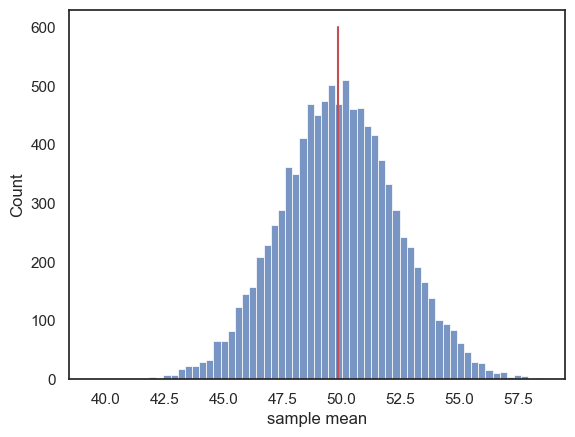

In [5]:
sns.histplot(m)
plt.plot([UKBrexdex.score.mean(), UKBrexdex.score.mean()],[0,600],'r-') # add a line for the population mean
plt.xlabel('sample mean')
plt.show()

This distribution is **the sampling distribution of the mean**.

We can see that the sample means are clustered around the mean of the parent distribution (indicated by the red line).

## Smaller samples, more variability

We saw previously that for smaller sample sizes, there is more random variability in the sample distribution. Naturally this means that the sample mean also varies more from sample to sample, when the sample size is small.

Let's repeat the exercise above, but comparing sample size of $n=20$, $n=100$ and $n=1000$:

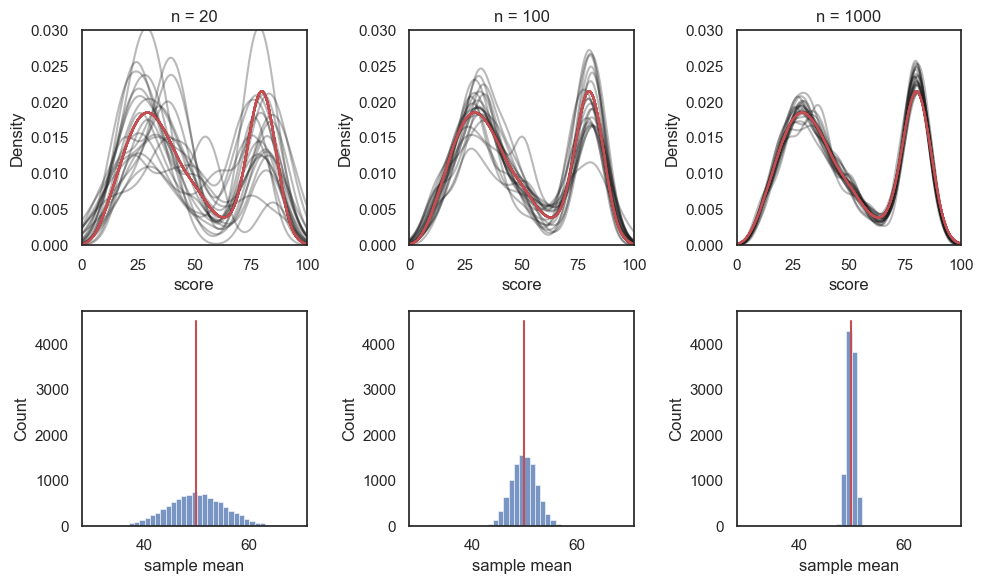

In [6]:
# You wouldn't be expected to produce this code yourself!
samplesize=[20,100,1000]
nSamples = 10000
plt.figure(figsize=[10,6])

for j in range(len(samplesize)):
    plt.subplot(2,3,j+1)
    for i in range(20):
        sample = UKBrexdex.sample(n=samplesize[j],replace=False)
        sns.kdeplot(sample.score, color='k', alpha=0.3, bw_adjust=0.5) # note I manually changed the smoothing of the KDS plot - this is a bit tangential to the point of the exercise though so don't get distracted by it
        plt.xlim([0,100])
        plt.ylim([0, 0.03])
        sns.kdeplot(UKBrexdex.score,color='r')   
        plt.title('n = ' + str(samplesize[j]))
    plt.subplot(2,3,j+4)

    m=np.empty(nSamples) # make an array to store the means
    for i in range(nSamples):
        sample = UKBrexdex.sample(n=samplesize[j],replace=False)
        m[i] = sample.score.mean()
    sns.histplot(m, bins=range(30,70))
    plt.plot([UKBrexdex.score.mean(), UKBrexdex.score.mean()],[0,4500],'r-') # add a line for the population mean
    plt.xlabel('sample mean')
    
plt.tight_layout()
plt.show()


* Top row: As the sample size increases, the data distribution within each sample (black lines) conforms more closely to the parent data distribution (red line)
* Bottom row: sample mean for 10,000 samples at each sample size - as the sample size increases, the random variation in the sample mean decreases. For large smaples, the sample mean tends to be very close to the mean of the parent distribution.

## Standard Error of the mean

Although the sample means group around the mean of the parent distrbution, there is some random variation, as some samples (by chance) contain higher Brexdex scores than others.

The variability of the sample means is quantified by the standard deviation of the sampling distribution of the mean (ie the standard deviation of the data in the histograms above). We can see that this standard deviation gets lower (histograms get narrower) as the sample size gets larger.

The standard deviation of the sampling distribution of the mean has a special name, the **standard error of the mean** or SEM, and is given by the formula:

$$ SEM = \frac{\sigma}{\sqrt{n}} $$

... where $\sigma$ is the standard deviation of the parent distribution, which in this case where we (unusually) have access to the parent distribution of 10000 individuals, we can obtain as follows:

In [7]:
UKBrexdex.score.std()

24.792720561876358

Shall we check if the formula for the SEM gives us a match to the standard deviation of the sampling distribution of the mean?

In [8]:
# run simulation for samples of size 100
nSamples = 10000 # we will draw 10,000 samples
samplesize=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()

print('sd of sampling distribution (from simulation) = ' + str(m.std()))

SEM = UKBrexdex.score.std()/(samplesize**0.5) # n to the power 0.5 is sqrt of n
print('SEM from the formula = ' + str(SEM))

sd of sampling distribution (from simulation) = 2.4796620898096173
SEM from the formula = 2.479272056187636


This is not a bad match!

You can try changing the sample size $n$ and check it still works.

## $SEM \propto \frac{1}{\sqrt{n}} $

The standard error of the mean is inversely proportional to $\sqrt{n}$

In other words, the random variability in sample means decreases as sample size $n$ increases - but in proportion to $\sqrt{n}$ not $n$ itself

This means that as we increase our sample size, our estimate of the population mean becomes less uncertain, but as we add more and more people to the sample, the benefit of adding more diminishes.
